In [2]:
from pathlib import Path

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import spectra

DATA_DIR = Path('../data')
%matplotlib inline

# Problem 2

In [3]:
# Load Auckland roads as a geodataframe

path = DATA_DIR/'auckland_new-zealand_roads_gen1.geojson'  # 50 m tolerance
roads = gpd.read_file(str(path))
roads['osm_id'] = roads['osm_id'].astype(int).astype(str)
roads.head()

,access,bridge,class,geometry,name,oneway,osm_id,ref,service,tunnel,type,z_order
0,None,0,highway,LINESTRING (174.885374754468 -36.9925097039147...,Redoubt Road,1,4077492,None,None,0,secondary,5.0
1,None,0,highway,LINESTRING (174.7825679460168 -36.926756607184...,Neilson Street,0,4077500,None,None,0,primary,6.0
2,None,0,highway,LINESTRING (174.8133010321928 -36.920145632513...,Church Street,0,4077501,10,None,0,primary,6.0
3,yes,0,highway,LINESTRING (174.7635943347171 -36.858437809893...,Grafton Bridge,0,4279302,None,None,0,secondary,5.0
4,None,0,highway,LINESTRING (174.7613962644289 -36.857914276220...,Upper Queen Street,0,4279661,4,None,0,secondary,5.0


In [4]:
# Reproject to NZTM 

print(roads.crs)
CRS_WGS84 = roads.crs
roads = roads.to_crs(epsg=2193)
print(roads.crs)
CRS_NZTM = roads.crs
roads.head()

{'init': 'epsg:4326'}
{'no_defs': True, 'init': 'epsg:2193'}


,access,bridge,class,geometry,name,oneway,osm_id,ref,service,tunnel,type,z_order
0,None,0,highway,LINESTRING (1767778.116978053 5904297.21402450...,Redoubt Road,1,4077492,None,None,0,secondary,5.0
1,None,0,highway,LINESTRING (1758765.076053659 5911768.63763862...,Neilson Street,0,4077500,None,None,0,primary,6.0
2,None,0,highway,LINESTRING (1761516.533885194 5912450.48134130...,Church Street,0,4077501,10,None,0,primary,6.0
3,yes,0,highway,LINESTRING (1757215.13659337 5919379.770159338...,Grafton Bridge,0,4279302,None,None,0,secondary,5.0
4,None,0,highway,LINESTRING (1757020.244158367 5919441.47088102...,Upper Queen Street,0,4279661,4,None,0,secondary,5.0


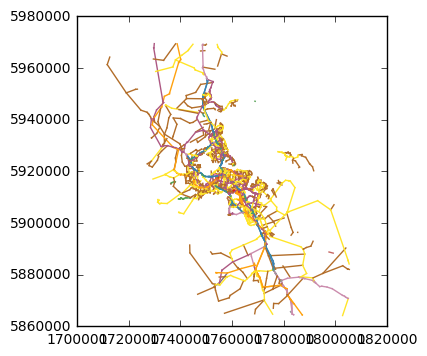

In [5]:
# Plot

roads.plot(column='type')

# Problem 3

In [6]:
# Load NZ crashes as a dataframe

path = DATA_DIR/'nz_crashes_2011--2016.csv'
crashes = pd.read_csv(path)
crashes.head().T

,0,1,2,3,4
CRASH_YEAR,2011,2011,2011,2011,2011
CRASH_SEV,F,F,F,F,F
fatal_count,1,1,1,1,2
seriousinj_count,1,1,1,1,0
minorinj_count,4,4,0,0,0
MULTI_VEH,Multi vehicle,Multi vehicle,Multi vehicle,Single vehicle,Multi vehicle
HOLIDAY,Christmas/New Year,Christmas/New Year,Christmas/New Year,Christmas/New Year,None
lg_region,Bay of Plenty,Waikato,Waikato,Auckland,Bay of Plenty
TLA_ID,27,13,11,7,23
TLA_NAME,Opotiki District,Waikato District,Thames-Coromandel District,Auckland,Tauranga City


In [7]:
# Filter data frame and drop bad locations

f = crashes.copy()
cond = f['lg_region'] == 'Auckland'
#cond &= f['MULTI_VEH'].str.contains(r'cyclist|pedestrian', case=False)
cond &= (f['EASTING'] > 0) & (f['NORTHING'] > 0)
f = f[cond].copy()

# Convert to geodataframe in NZTM

geometry = [Point(p) for p in zip(f['EASTING'], f['NORTHING'])]
crashes = gpd.GeoDataFrame(f, crs=CRS_NZTM, geometry=geometry)
print(crashes.crs)
crashes.T

{'no_defs': True, 'init': 'epsg:2193'}


,3,5,13,15,16,20,21,25,27,28,...,49930,49937,49944,49963,49965,49966,49977,49978,49982,49983
CRASH_YEAR,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,...,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
CRASH_SEV,F,F,F,F,F,F,F,F,F,F,...,M,S,S,M,S,M,S,M,M,M
fatal_count,1,1,1,1,1,1,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
seriousinj_count,1,1,0,0,0,0,0,0,0,4,...,0,1,1,0,1,0,1,0,0,0
minorinj_count,0,0,1,0,0,0,0,0,0,0,...,1,1,0,1,0,2,0,1,1,1
MULTI_VEH,Single vehicle,Multi vehicle,Multi vehicle,Multi vehicle,Multi vehicle,Vehicle(s)+Pedestrian(s),Single vehicle,Single vehicle,Single vehicle,Multi vehicle,...,Multi vehicle,Multi vehicle,Vehicle(s)+Pedestrian(s),Single vehicle,Vehicle(s)+Pedestrian(s),Single vehicle,Multi vehicle,Multi vehicle,Multi vehicle,Multi vehicle
HOLIDAY,Christmas/New Year,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,Easter,None,None,None,Christmas/New Year
lg_region,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,...,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland
TLA_ID,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
TLA_NAME,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,...,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland


# Problem 4

In [ ]:
# Plot crashes on roads

base = roads.plot(color='black')
crashes.plot(ax=base, marker='o', color='red', markersize=3)

# Problem 5

In [8]:
# Spatial-join roads and buffered crash points

r = roads[['geometry', 'osm_id', 'name', 'class']]
c = crashes[['geometry', 'CRASH_SEV']].copy()
c['geometry'] = c['geometry'].buffer(10)
f = gpd.sjoin(r, c, how='inner')
f

,geometry,osm_id,name,class,index_right,CRASH_SEV
0,LINESTRING (1767778.116978053 5904297.21402450...,4077492,Redoubt Road,highway,2523,M
2283,LINESTRING (1767791.477600971 5903962.81922155...,77350008,Great South Road,highway,2523,M
3845,LINESTRING (1767637.767513235 5904283.68400765...,150576644,Manukau Station Road,highway,2523,M
3878,LINESTRING (1767587.805189282 5904627.71478708...,150701358,Great South Road,highway,2523,M
0,LINESTRING (1767778.116978053 5904297.21402450...,4077492,Redoubt Road,highway,37494,M
2320,LINESTRING (1767979.890629536 5904329.84242963...,79605480,Redoubt Road,highway,37494,M
1,LINESTRING (1758765.076053659 5911768.63763862...,4077500,Neilson Street,highway,10552,M
88,LINESTRING (1758188.337122448 5911911.60221063...,4309879,None,highway,10552,M
2918,LINESTRING (1758765.076053659 5911768.63763862...,117599450,Gloucester Park Road,highway,10552,M
4894,LINESTRING (1758768.214096504 5911757.51803280...,217844827,Gloucester Park Road,highway,10552,M


In [9]:
oid = '100761816'
f[f['osm_id'] == oid]

,geometry,osm_id,name,class,index_right,CRASH_SEV


In [10]:
# Assign crash scores to roads

f['#crashes'] = 1

g = f.groupby('osm_id').agg({
    'geometry': 'first', 
    'name': 'first', 
    '#crashes': 'sum',
#    'num_crashes_weighted': 'sum',
    }).reset_index()

g = gpd.GeoDataFrame(g, crs=CRS_NZTM)  # Lost the geodataframe during the groupby
g['length_m'] = g['geometry'].length
g['#crashes/m'] = g['#crashes']/g['length_m']
g = g.sort_values('#crashes/m', ascending=False)
crashy_roads = g.copy()
g

,osm_id,#crashes,name,geometry,length_m,#crashes/m
2185,326487533,8,Massey Road,LINESTRING (1763374.763724625 5908433.15188175...,7.821663,1.022800
2234,334450327,5,Massey Road,LINESTRING (1761710.035363007 5906529.77931559...,5.241659,0.953897
2372,373835442,6,Hibiscus Coast Highway,LINESTRING (1749953.404430177 5946087.71054170...,7.533971,0.796393
2689,450027290,11,Ti Rakau Drive,LINESTRING (1770326.277210595 5911324.38194685...,15.518462,0.708833
969,154227174,5,Mount Wellington Highway offramp,LINESTRING (1763878.057528016 5912600.02890272...,7.686945,0.650453
972,154227191,4,None,LINESTRING (1763904.445168815 5912490.33971071...,6.666481,0.600017
68,114133938,4,Symonds Street,LINESTRING (1757211.462371929 5919373.89371228...,6.930551,0.577155
973,154227192,4,None,LINESTRING (1763883.968352459 5912595.11450732...,7.180216,0.557086
1385,207249359,11,Great South Road,LINESTRING (1761069.636508226 5914364.92156405...,19.785928,0.555951
1383,207249354,9,Ellerslie Panmure Highway,LINESTRING (1761080.325824664 5914348.27159567...,17.818328,0.505098


# Problem 6

In [12]:
# Color-code roads by number of crashes.
# Use Spectra for the coloring.

r = crashy_roads.round(3)
r = gpd.GeoDataFrame(r, crs=CRS_NZTM)  # Lost the geodataframe during rounding

# Color
print(r.describe())
cuts = [0] + [r['#crashes/m'].quantile(k/100) for k in [25, 50, 75, 98, 100]]

colors = reversed(['#d7191c', '#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba'])
scale = spectra.scale(colors).colorspace('lch').domain(cuts)
r['stroke'] = r['#crashes/m'].map(
  lambda x: scale(x).hexcode)

# Thickness
r['stroke-width'] = 10

# Export to GeoJSON and plot in geojsonio for a closer look
path = Path('auckland_crashy_roads.geojson')
geo = r.to_crs(CRS_WGS84).to_json()
with path.open('w') as tgt:
    tgt.write(geo)
    
# path = Path('auckland_crashes.geojson')
# geo = crashes[['geometry', 'CRASH_SEV']].to_crs(CRS_WGS84).to_json()
# with path.open('w') as tgt:
#     tgt.write(geo)




          #crashes      length_m   #crashes/m
count  3510.000000   3510.000000  3510.000000
mean      4.087464    482.892670     0.031304
std       4.199708    882.940471     0.062038
min       1.000000      4.706000     0.000000
25%       1.000000     85.174500     0.005000
50%       3.000000    254.573500     0.013000
75%       5.000000    549.915000     0.031000
max      62.000000  14709.928000     1.023000
